In [34]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Задача 1 Даны значения величины заработной платы заемщиков банка (zp) и значения их
поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические
операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату
(то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая
переменная). Произвести расчет как с использованием intercept, так и без.


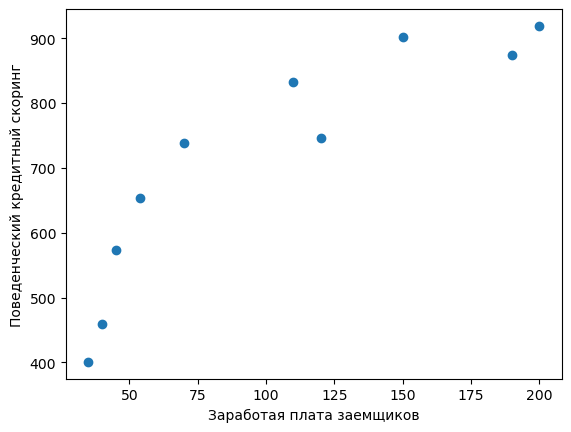

In [23]:
plt.scatter(zp, ks)
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()

In [ ]:
Опираясь на график, мы можем предположить линейную зависимость между величинами.

In [129]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) #x
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #y
#y = b0+b1*x
n = len(zp)
b1 = (n*np.sum(zp*ks)-np.sum(zp)*np.sum(ks))/(n*np.sum(zp**2)-(np.sum(zp))**2)

yh = np.sum(ks)/n
xh = np.sum(zp)/n
b0 = yh-b1*xh
print(f'Коээфициент линейной регрессии равен {round(b1,2)}, Интерсепт равен {round(b0,2)}')
print()

model = LinearRegression()
x = zp.reshape([-1,1])
y = ks.reshape([-1,1])
x, y
regres = model.fit(x, y)
print(f'Рассчет по функциям дает тот же результат:')
print(f'Коэффициент линейной регрессии {regres.coef_}')
print(f'Интерсепт {regres.intercept_}')
print()

Коээфициент линейной регрессии равен 2.62, Интерсепт равен 444.18

Рассчет по функциям дает тот же результат:
Коэффициент линейной регрессии [[2.62053888]]
Интерсепт [444.17735732]



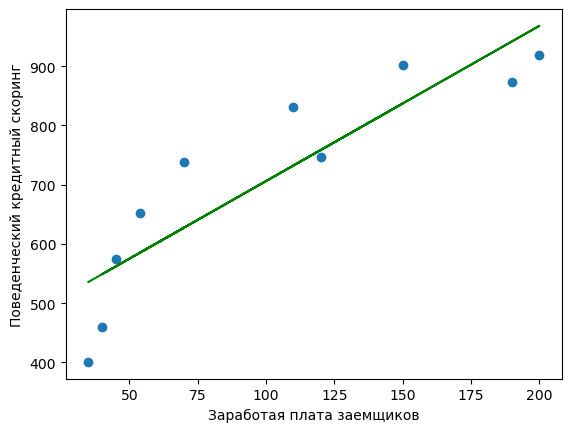

In [123]:
plt.scatter(zp, ks)
plt.plot(zp, 444.18+2.62*zp, c = 'g')
plt.xlabel('Заработая плата заемщиков')
plt.ylabel('Поведенческий кредитный скоринг', rotation = 90)
plt.show()

In [ ]:
Проведенный расчет показывает линейную взаимосвязь между заработной платой заемщиков и кредитным скорингом.

Задача 2 Посчитать коэффициент линейной регрессии при заработной плате (zp), используя
градиентный спуск (без intercept).

In [55]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) #x
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #y
n = len(zp)
m = len(ks)
n, m

(10, 10)

In [120]:
def mse_(b1, x, y, n):
    return (np.sum((b1*x-y)**2))/n

alpha = 1e-6

b1 = 0.1
n = 10

for i in range (1000):
        b1-=alpha*(2/n)*np.sum((b1*x-y)*x)
        if i%100 == 0:
            print('Iteration = {i}, b1 = {b1}, mse = {mse}'.format(i = i, b1=b1, mse = mse_(b1, x, y, n)))

Iteration = 0, b1 = 0.25952808, mse = 493237.7212546963
Iteration = 100, b1 = 5.54537842245223, mse = 58151.31823171113
Iteration = 200, b1 = 5.868748638669329, mse = 56522.97550129376
Iteration = 300, b1 = 5.888531320728348, mse = 56516.88130936019
Iteration = 400, b1 = 5.8897415574471985, mse = 56516.85850140053
Iteration = 500, b1 = 5.889815595583751, mse = 56516.858416040064
Iteration = 600, b1 = 5.889820124983314, mse = 56516.85841572062
Iteration = 700, b1 = 5.889820402076462, mse = 56516.85841571941
Iteration = 800, b1 = 5.88982041902807, mse = 56516.8584157194
Iteration = 900, b1 = 5.889820420065112, mse = 56516.85841571941
